# Importando Bibiotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point
from geodatasets import get_path

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importação do Banco de Dados 

In [9]:
df = pd.read_csv('E:\\Usuario\\Desktop\\DesafioDS\\teste_indicium_precificacao.csv')

Visualização do Banco de Dados

In [10]:
#Visualização seletiva
df.head(5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [11]:
# Visualizar a quantidade de linhas e colunas
df.shape

(48894, 16)

Informações sobre as colunas do banco de dados 

In [12]:
"""Informações sobre as colunas, os tipos das variáveis e também a quantidade de valores
 nulos em cada coluna"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

No banco de dados temos colunas com variavéis do tipo int64, float64 e object.

**Classificação das variáveis**

*Quanlitativa Nominal:* id, nome, host_id, host_name, bairro_group, bairro, room_type

*Quantitativa Contínua:* latitude, longitude, ultima_review, reviews_por_mes

*Quantitativa Discreta:* price, minimo_noites, numero_de_reviews,calculado_host_listings_count, disponibilidade_365

In [13]:
# Analisar valores únicos
df.nunique()

id                               48894
nome                             47904
host_id                          37457
host_name                        11452
bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

In [14]:
# Como as colunas ultima_reviews e reviews_por_mes tem muitos NaN será necessário trata-los
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

As colunas 'nome' e 'host_name' possuem poucas linhas com valores nulos; portanto, removê-las não prejudicará nosso banco de dados. No entanto, as colunas 'ultima_reviews' e 'reviews_por_mes' devem ser tratadas para não prejudicar as análises. Como a coluna 'ultima_review' é do tipo 'object', os valores NaN serão substituídos por 'Não informado', enquanto 'reviews_por_mes' será substituída por 0.

In [15]:
df['reviews_por_mes'].fillna(0, inplace=True)
df['ultima_review'].fillna('Não Informado', inplace=True)
df.head(4)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Não Informado,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
# excluir valores nulos em nome e host_name
df = df.dropna()
#Verificar se possui mais algum valor nulo
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [17]:
#Vericar os valores da coluna price
df['price'].sort_values().unique()

array([    0,    10,    11,    12,    13,    15,    16,    18,    19,
          20,    21,    22,    23,    24,    25,    26,    27,    28,
          29,    30,    31,    32,    33,    34,    35,    36,    37,
          38,    39,    40,    41,    42,    43,    44,    45,    46,
          47,    48,    49,    50,    51,    52,    53,    54,    55,
          56,    57,    58,    59,    60,    61,    62,    63,    64,
          65,    66,    67,    68,    69,    70,    71,    72,    73,
          74,    75,    76,    77,    78,    79,    80,    81,    82,
          83,    84,    85,    86,    87,    88,    89,    90,    91,
          92,    93,    94,    95,    96,    97,    98,    99,   100,
         101,   102,   103,   104,   105,   106,   107,   108,   109,
         110,   111,   112,   113,   114,   115,   116,   117,   118,
         119,   120,   121,   122,   123,   124,   125,   126,   127,
         128,   129,   130,   131,   132,   133,   134,   135,   136,
         137,   138,

Ao examinar os valores, notou-se a presença de zeros na coluna de preços, o que parece inconsistente, uma vez que se trata de uma plataforma de aluguel. Portanto, como correspondem a 11 linhas, optou-se por excluí-los. 

In [18]:
df = df[df['price'] != 0]
df['price'].sort_values().unique()

array([   10,    11,    12,    13,    15,    16,    18,    19,    20,
          21,    22,    23,    24,    25,    26,    27,    28,    29,
          30,    31,    32,    33,    34,    35,    36,    37,    38,
          39,    40,    41,    42,    43,    44,    45,    46,    47,
          48,    49,    50,    51,    52,    53,    54,    55,    56,
          57,    58,    59,    60,    61,    62,    63,    64,    65,
          66,    67,    68,    69,    70,    71,    72,    73,    74,
          75,    76,    77,    78,    79,    80,    81,    82,    83,
          84,    85,    86,    87,    88,    89,    90,    91,    92,
          93,    94,    95,    96,    97,    98,    99,   100,   101,
         102,   103,   104,   105,   106,   107,   108,   109,   110,
         111,   112,   113,   114,   115,   116,   117,   118,   119,
         120,   121,   122,   123,   124,   125,   126,   127,   128,
         129,   130,   131,   132,   133,   134,   135,   136,   137,
         138,   139,

In [20]:
#Análise estatística das colunas
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.884600e+04,4.884600e+04,48846.000000,48846.000000,48846.000000,48846.000000,48846.000000,48846.000000,48846.000000,48846.000000
mean,1.902339e+07,6.763510e+07,40.728947,-73.952176,152.774782,7.012488,23.270913,1.091032,7.149040,112.794436
std,1.098388e+07,7.862980e+07,0.054529,0.046162,240.250956,20.021549,44.551056,1.597211,32.968608,131.612347
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475226e+06,7.816403e+06,40.690090,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.968422e+07,3.079133e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915840e+07,1.074344e+08,40.763110,-73.936293,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [21]:
#Separar as colunas numericas para análise de correlação.

numericas = df.drop(columns=['id', 'host_id', 'latitude', 'longitude'
                             ]).select_dtypes(include=['number'])
numericas 

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,225,1,45,0.38,2,355
1,150,3,0,0.00,1,365
2,89,1,270,4.64,1,194
3,80,10,9,0.10,1,0
4,200,3,74,0.59,1,129
...,...,...,...,...,...,...
48889,70,2,0,0.00,2,9
48890,40,4,0,0.00,2,36
48891,115,10,0,0.00,1,27
48892,55,1,0,0.00,6,2


Verificar a presença de outliers em cada coluna numérica, a fim de determinar se necessitam de algum tratamento adicional

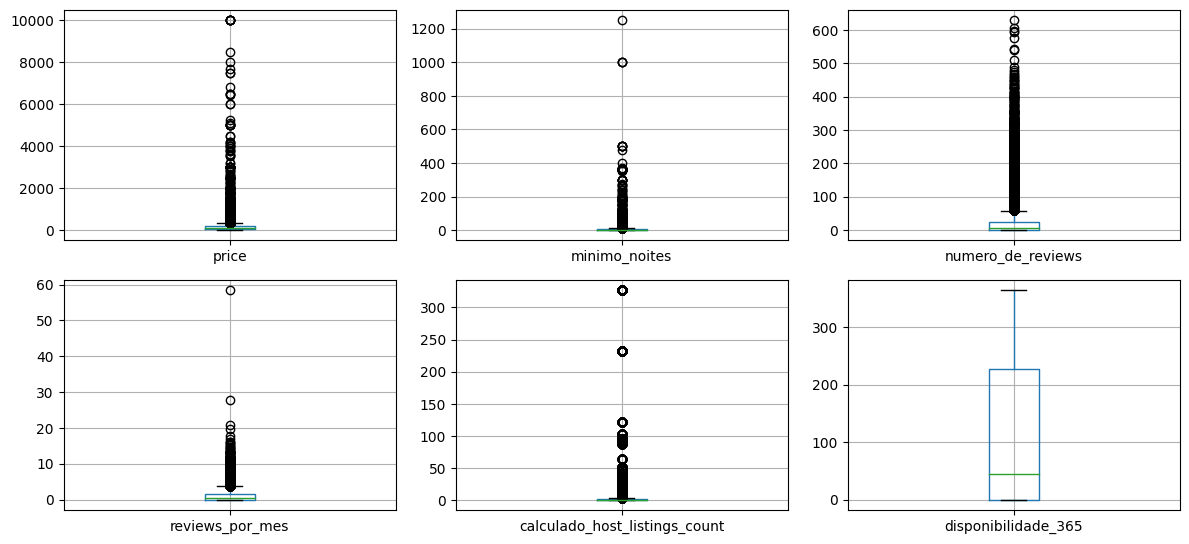

In [18]:
fig = plt.figure(figsize = (12,8))

for i, col in enumerate(numericas):
    plt.subplot(3,3,i+1)
    df.boxplot(col)
    plt.tight_layout()
plt.show()

Ao analisar os boxplots, observou-se a presença de muitos outliers nos gráficos de 'price', 'minimo_noites', 'numeros_de_reviews', 'reviews_por_mes' e 'calculado_host_listings_count', os quais precisam ser tratados. Para esse fim, será utilizada a análise de percentil. Optou-se por selecionar o percentil 98% para a eliminação de outliers, a fim de evitar a exclusão de um número excessivo de linhas.

In [22]:
quartis_personalizados = [0.90,0.95,0.96,0.97,0.98,0.99,1.00]
df['price'].describe(percentiles=quartis_personalizados)


count    48846.000000
mean       152.774782
std        240.250956
min         10.000000
50%        106.000000
90%        269.000000
95%        355.000000
96%        400.000000
97%        450.000000
98%        550.000000
99%        799.000000
100%     10000.000000
max      10000.000000
Name: price, dtype: float64

In [23]:
colunas = ['price', 'minimo_noites','numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count']

# Calculando o percentil 96% para cada coluna
percentis_98 = df[colunas].describe(percentiles=[0.98]).loc['98%']

# Filtrando o DataFrame original
df_aluguel_s_outliers = df[(df[colunas] <= percentis_98).all(axis=1)]

df_aluguel_s_outliers.head(4)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Não Informado,0.00,1,365
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Plotando novamente os boxplots para verificar como ficou os dados após as exclusões

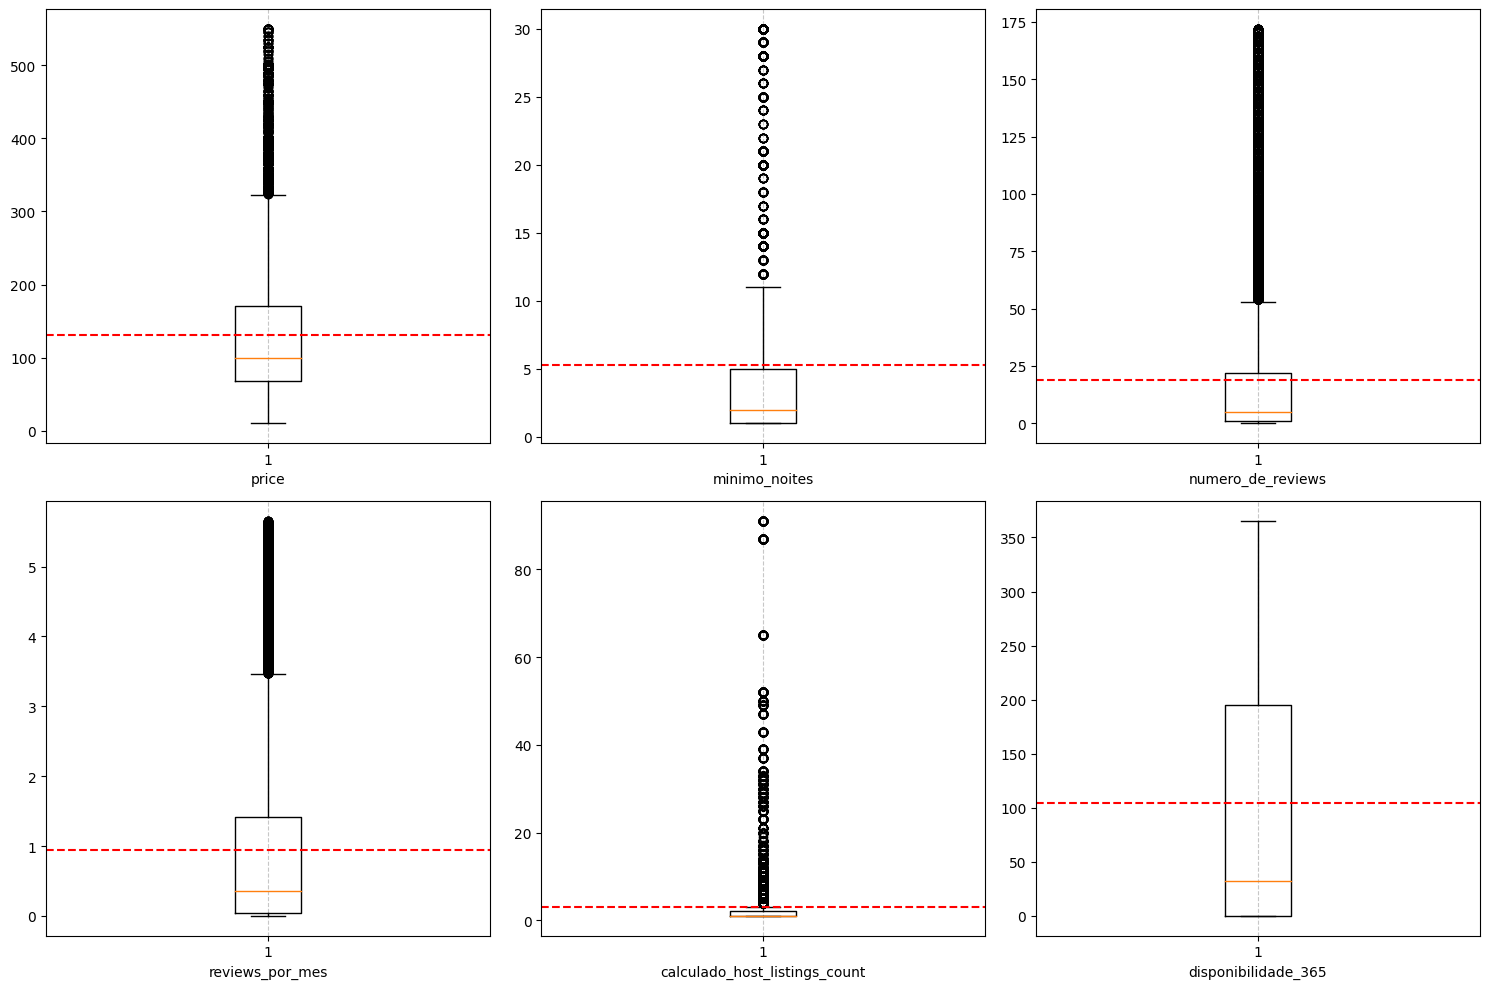

In [24]:
colunas = ['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

# Configurando o tamanho total da figura
plt.figure(figsize=(15, 10))

# Loop sobre as colunas para criar gráficos individuais
for i, coluna in enumerate(colunas, 1):
    plt.subplot(2, 3, i)  # 2 linhas, 3 colunas, posição atual i
    plt.boxplot(df_aluguel_s_outliers[coluna])
    plt.xlabel(coluna)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.axhline(y=df_aluguel_s_outliers[coluna].mean(), label="Média", linestyle='--', color="red")

plt.tight_layout()  
plt.show()

Apesar dos dados de 'calculado_host_listings_count' ainda possuírem vários outliers, optou-se por não tratá-los adicionalmente, pois as outras colunas de maior interesse apresentam uma melhoria significativa.

In [25]:
#Verificar como ficou o banco de dados após a exclusão.
df_aluguel_s_outliers.shape

(44498, 16)

Salvando os dados tratados para utilizar posteriormente no modelo de machine learning

In [23]:
#Salvando os dados
df_aluguel_s_outliers.to_csv('dados_menos_outliers.csv', index=False)

Realizamos análises de correlação para determinar quais variáveis influenciam positiva ou negativamente no preço. Utilizamos a correlação de Spearman, pois ela abrange tanto correlações lineares quanto não lineares.

Text(0.5, 1.0, 'Correlação de spearman')

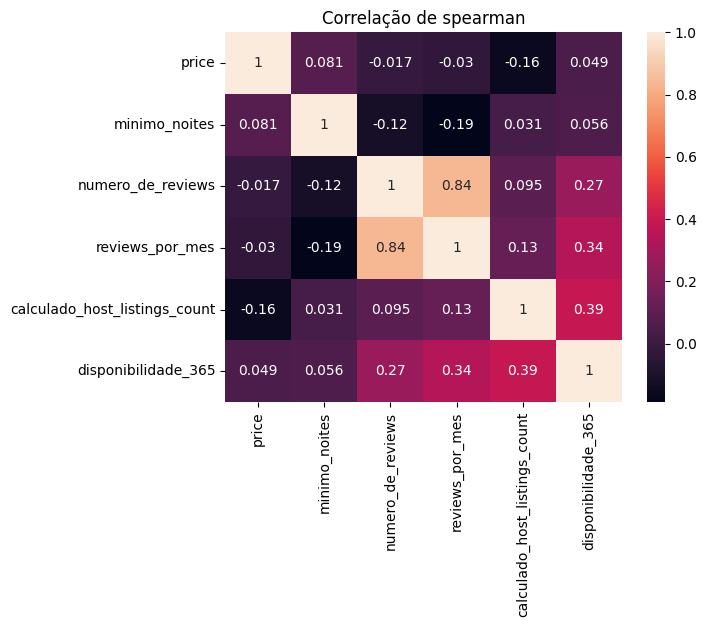

In [26]:
num_s_outliers = df_aluguel_s_outliers[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
      'disponibilidade_365' ]]
figsize = (18,8)

#O método spearman verifica correlações lineares e não lineares
sns.heatmap(num_s_outliers.corr(method='spearman'), annot=True)
plt.title("Correlação de spearman")


Observa-se que nenhuma variável mostrou correlação significativa com o preço, visto que seus valores foram próximos de 0.

### Verificar a faixa de aluguéis

Como há uma grande variedade de valores únicos de aluguéis, optamos por agrupá-los para melhorar a visualização dos gráficos. Após a exclusão dos outliers a faixa de variação do aluguel vai de 10 a 550.

In [27]:
intervalos = [10, 100, 200, 300, 400, 500, 600]
rotulos = ['10-100', '101-200', '201-300','301-400','401-500','501-550']
df_aluguel_s_outliers['faixas_preco'] = pd.cut(df_aluguel_s_outliers['price'], bins= intervalos, labels=rotulos)

df_aluguel_s_outliers

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,faixas_preco
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,201-300
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Não Informado,0.00,1,365,101-200
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,10-100
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,101-200
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,10-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Não Informado,0.00,2,9,10-100
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Não Informado,0.00,2,36,10-100
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Não Informado,0.00,1,27,101-200
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Não Informado,0.00,6,2,10-100


Verificou quais os valores têm mais frequências nas colunas de 'price', 'minimo_noites', 'disponibilidade_365', 'reviews_por_mes'.

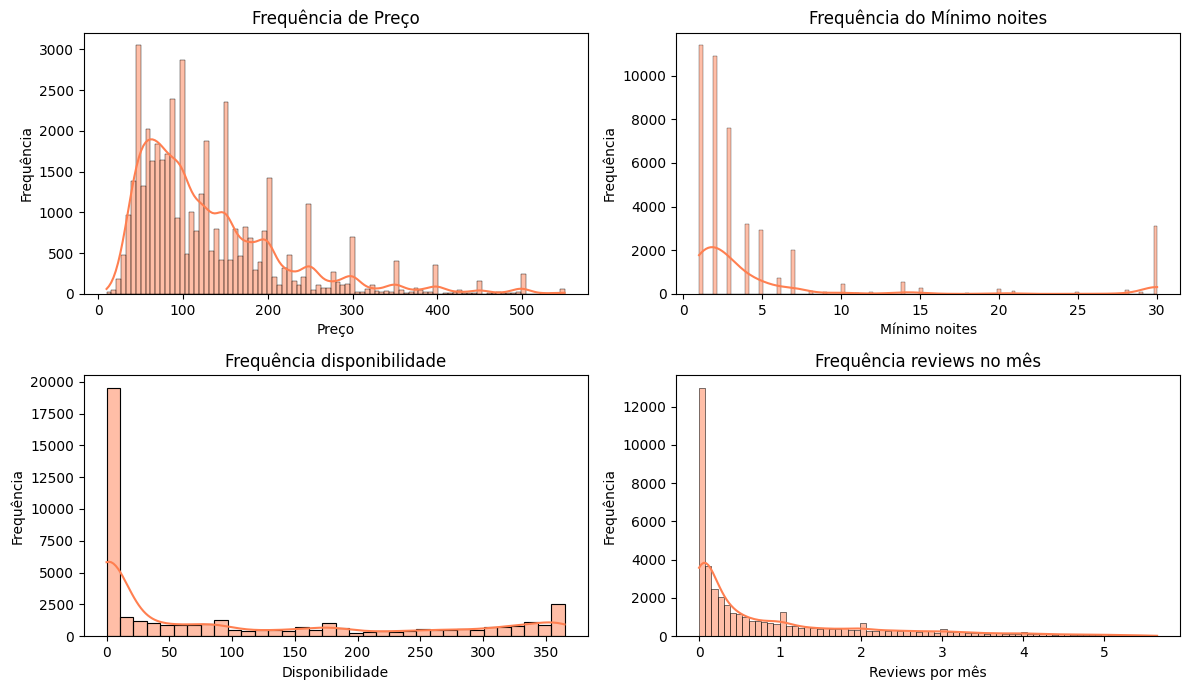

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

# Histograma preço
sns.histplot(df_aluguel_s_outliers['price'], ax=ax[0,0], kde=True, color = 'coral')
ax[0,0].set_title('Frequência de Preço')
ax[0,0].set_xlabel('Preço')
ax[0,0].set_ylabel('Frequência')

# Histograma minimo_noites
sns.histplot(df_aluguel_s_outliers['minimo_noites'], ax=ax[0,1], kde=True,  color = 'coral')
ax[0,1].set_title('Frequência do Mínimo noites')
ax[0,1].set_xlabel('Mínimo noites')
ax[0,1].set_ylabel('Frequência')

#Histograma disponibilidade_365
sns.histplot(df_aluguel_s_outliers['disponibilidade_365'], ax=ax[1,0], kde=True, color = 'coral')
ax[1,0].set_title('Frequência disponibilidade')
ax[1,0].set_xlabel('Disponibilidade')
ax[1,0].set_ylabel('Frequência')

#Histograma reviews_por_mes
sns.histplot(df_aluguel_s_outliers['reviews_por_mes'], ax=ax[1,1], kde=True, color = 'coral')
ax[1,1].set_title('Frequência reviews no mês')
ax[1,1].set_xlabel('Reviews por mês')
ax[1,1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

A maioria dos histogramas apresenta uma assimetria à direita, com uma concentração maior em torno do valor 0. No entanto, o histograma do preço difere, pois exibe uma distribuição mais uniforme dos valores até o valor de 200.

### Verificou-se como o preço se comporta em relação algumas variáveis.

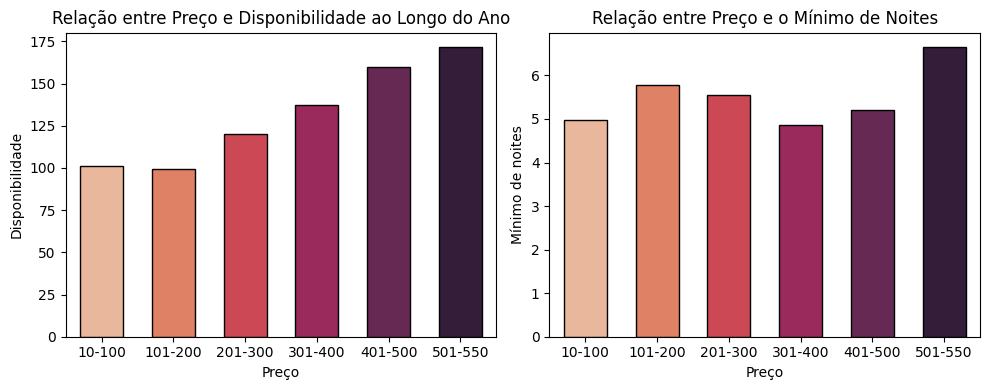

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico de barras do preco em relação a disponibilidade_365
sns.barplot(x='faixas_preco', y='disponibilidade_365',
            data=df_aluguel_s_outliers, palette = 'rocket_r', edgecolor= 'black',
            ci = None,width=0.6, ax=axs[0])
axs[0].set_xlabel('Preço')
axs[0].set_ylabel('Disponibilidade')
axs[0].set_title('Relação entre Preço e Disponibilidade ao Longo do Ano')

# Gráfico de barras do preco em relação ao minimo de noites
sns.barplot(x='faixas_preco', y='minimo_noites',
            data=df_aluguel_s_outliers, palette = 'rocket_r', edgecolor= 'black',
            ci = None, width=0.6, ax=axs[1])
axs[1].set_xlabel('Preço')
axs[1].set_ylabel('Mínimo de noites')
axs[1].set_title('Relação entre Preço e o Mínimo de Noites')


plt.tight_layout()
plt.show()

Tendo em vista que o mapa de correlação não revela uma correlação entre o preço e a disponibilidade, ao agrupar os valores em faixas de preço, observamos que há uma tendência de que aluguéis mais caros apresentem uma média maior de dias disponíveis. Quanto ao número mínimo de noites, embora não apresente um padrão tão claro quanto a disponibilidade, podemos concluir que aluguéis mais caros tendem a exigir um mínimo de noites maior.

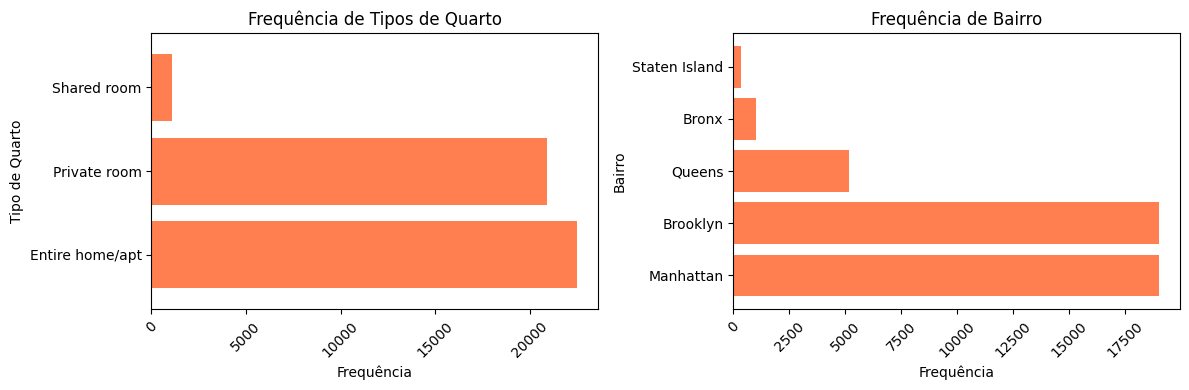

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#Gráfico da frequencia de quarto 
df_aluguel_s_outliers['room_type'].value_counts().plot(kind='barh', width=0.8, 
                                                       color='coral', ax=axs[0])
axs[0].set_xlabel('Frequência')
axs[0].set_ylabel('Tipo de Quarto')
axs[0].set_title('Frequência de Tipos de Quarto')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico da frequencia de bairros
df_aluguel_s_outliers['bairro_group'].value_counts().plot(kind='barh', width=0.8,
                                                          color='coral', ax=axs[1])
axs[1].set_xlabel('Frequência')
axs[1].set_ylabel('Bairro')
axs[1].set_title('Frequência de Bairro')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Ao analisar a frequência dos tipos de quartos, observa-se que os quartos compartilhados são os menos comuns no banco de dados, enquanto os quartos privados e casas e apartamentos inteiros são os mais prevalentes. Quanto aos bairros, Manhattan e Brooklyn são os mais representados, o que é uma informação relevante para responder à próxima questão envolvendo onde é melhor investir

2.a - Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


Primeiramente, plotou um gráfico para melhor análise dos dados.

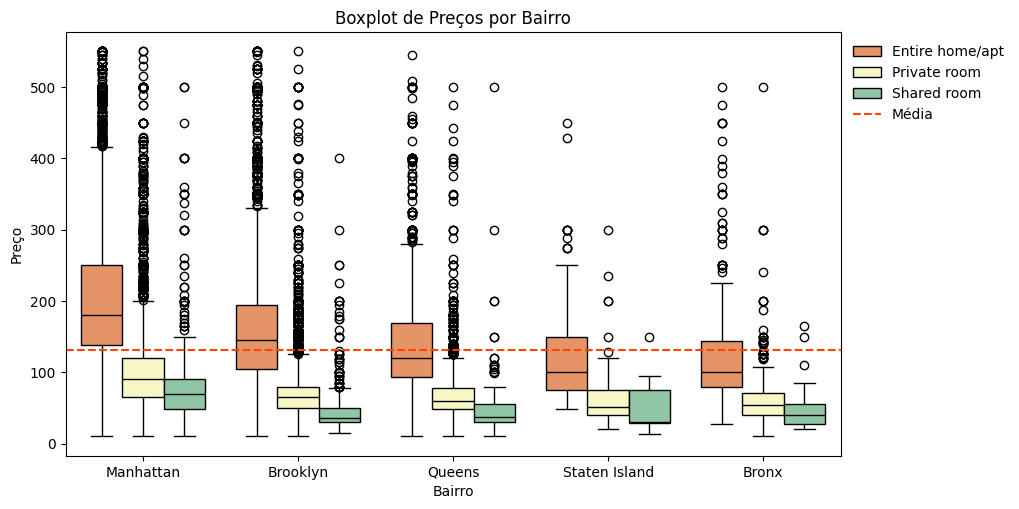

In [55]:
#Boxplot da média de preços por quarto por bairro
plt.figure(figsize=(10, 5.5))
sns.boxplot(x='bairro_group', y='price', hue= 'room_type', data=df_aluguel_s_outliers,
            linecolor= 'black', palette='Spectral')
plt.axhline(y=df_aluguel_s_outliers['price'].mean(), label="Média", linestyle='--', color="orangered")
plt.xlabel('Bairro')
plt.ylabel('Preço')
plt.title('Boxplot de Preços de Quartos por Bairro')
plt.legend(bbox_to_anchor=(1.0, 1.0),frameon=False)

plt.show()

Conclui-se que Manhattan e Brooklyn tem uma melhor média de aluguel, principalmente em relação a quartos e apartamentos inteiros. Mas sendo mais específico qual seria melhor bairro?

In [64]:
alugueis_manha= df_aluguel_s_outliers[df_aluguel_s_outliers['bairro_group'] == 'Manhattan']
alugueis_manha.groupby('bairro')['price'].mean().sort_values(ascending=False)

bairro
NoHo                   265.081081
Tribeca                260.201754
Flatiron District      234.164179
Midtown                222.462963
West Village           212.581121
SoHo                   208.086538
Greenwich Village      202.233429
Chelsea                201.835661
Murray Hill            194.984293
Nolita                 187.974684
Financial District     184.898263
Hell's Kitchen         183.592703
Theater District       182.076503
Gramercy               178.792763
Battery Park City      177.071429
Kips Bay               168.677108
East Village           166.958528
Civic Center           165.895833
Upper West Side        164.000564
Little Italy           163.549020
Upper East Side        161.557337
Chinatown              152.591954
Lower East Side        152.254459
Two Bridges            130.596774
East Harlem            120.047070
Stuyvesant Town        115.366667
Morningside Heights    109.646341
Harlem                 109.324597
Roosevelt Island        96.361111
Inwood 

Os bairros com melhores médias de aluguéis são: NoHo, Tribeca e Flatiron District. Todos eles localizados em uma região entre o Central Park e a Statue of Liberty. 

<img src="https://assets.bigcartel.com/product_images/39858549/rboyden_manhattan_lrg.jpg?auto=format&fit=max&h=1000&w=1000" alt="Mapa Manhattan" > 

A região de Manhattan é conhecida como o centro econômico de Nova York. Os bairros com os maiores aluguéis estão localizados próximos a pontos turísticos icônicos, como a Estátua da Liberdade, o Central Park e Chinatown. Isso também reflete na demanda por imóveis, como observado anteriormente. Portanto, apesar da alta concorrência existente, Manhattan continua sendo a melhor região para investimentos imobiliários, especialmente nos bairros localizados entre o Central Park e a Estátua da Liberdade. Além disso, investir em aluguéis de casas e quartos inteiros é uma opção mais vantajosa.

2.b - O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Text(0.5, 1.0, 'Correlação de spearman')

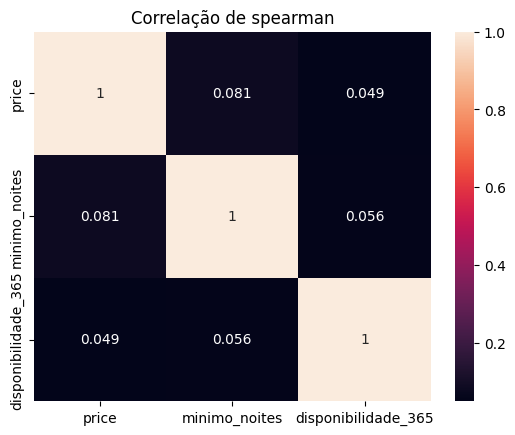

In [50]:
#Pegar um 'corte' da correlação anterior
num_s_outliers = df_aluguel_s_outliers[['price', 'minimo_noites', 'disponibilidade_365' ]]
figsize = (18,8)

#O método spearman verifica correlações lineares e não lineares
sns.heatmap(num_s_outliers.corr(method = "spearman"), annot=True)
plt.title("Correlação de spearman")

Como observado no mapa de calor a disponibilidade ao longo do ano e o mínimo de noites não interferem signficativamente no preço do aluguel.

2.c - Existe algum padrão no texto do nome do local para lugares de mais alto valor?


Primeiramente, foram identificadas as palavras mais frequentes em listagens de aluguéis de alto valor, considerando valores acima de 460 dólares.

In [69]:
palavras = [palavra for nome in df_aluguel_s_outliers.loc[df_aluguel_s_outliers['price'] >= 460, 'nome'] for palavra in str(nome).split()]
pd.Series(palavras).value_counts()[:30]

in              97
2               64
Loft            46
3               36
-               33
Apartment       33
Manhattan       31
to              30
Luxury          29
Bedroom         26
with            25
Williamsburg    24
West            24
Village         23
Duplex          21
Central         21
Beautiful       21
East            21
of              21
NYC             21
the             21
Midtown         20
New             20
Park            20
Brooklyn        20
Private         19
&               19
The             18
Penthouse       18
Bath            18
dtype: int64

Alguns termos listados chamaram a atenção por representarem palavras frequentemente associadas a hotéis de luxo ou apartamentos de alta classe, como 'Luxury' e 'Penthouse', entre outros, que não foram classificados como os mais frequentes. Em seguida, realizamos uma análise utilizando o describe para cada uma dessas palavras, a fim de identificar padrões nos imóveis que as incluíam.

In [82]:
teste = df_aluguel_s_outliers[df_aluguel_s_outliers['nome'].str.contains('Luxury',  case=False)]
teste.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,1.490000e+03,1.490000e+03,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,2.096410e+07,7.579191e+07,40.735913,-73.965249,201.350336,7.173154,13.464430,0.840705,4.904698,114.653020
std,1.079610e+07,8.486088e+07,0.044900,0.041294,108.745626,9.704960,26.099549,1.204608,13.860925,134.520474
min,2.569600e+04,1.052800e+04,40.575040,-74.122720,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.230541e+07,9.933040e+06,40.706435,-73.991105,120.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,2.186457e+07,3.672501e+07,40.742345,-73.973960,180.000000,3.000000,3.000000,0.270000,1.000000,43.000000
75%,3.059294e+07,1.249586e+08,40.763157,-73.948753,250.750000,6.000000,14.000000,1.100000,2.000000,231.750000
max,3.645316e+07,2.728153e+08,40.901540,-73.737330,550.000000,30.000000,170.000000,5.590000,91.000000,365.000000


Foi identificada a presença de outras palavras, como 'Deluxe' e 'Hilton', que também apresentam uma alta média de aluguel. No entanto, observou-se que essas palavras estão associadas a uma menor quantidade de registros no banco de dados. Portanto, decidiu-se selecionar apenas as palavras que têm uma quantidade maior de registros e uma média de aluguel mais elevada. 

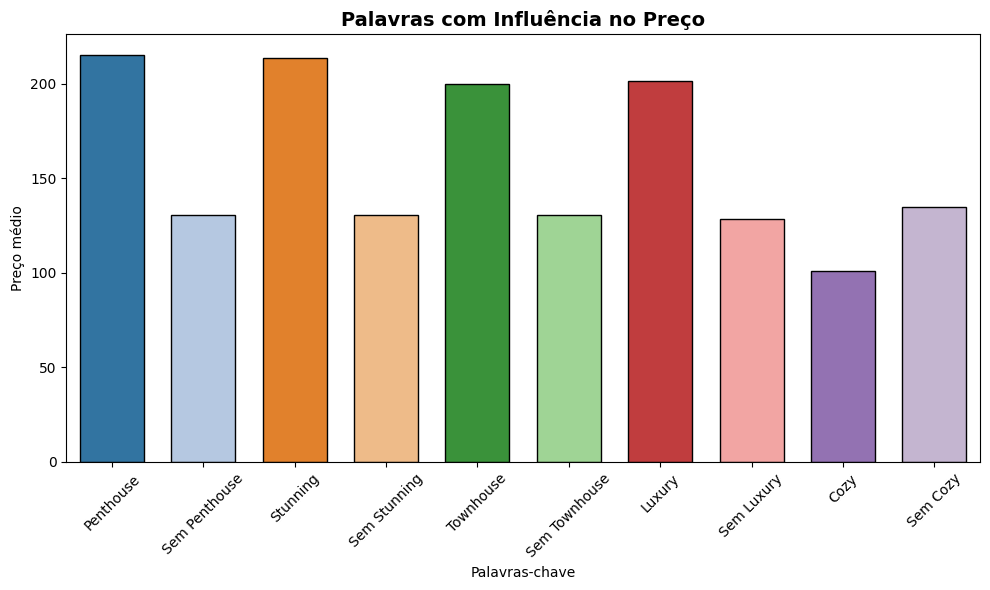

In [85]:
palavras = ['Penthouse', 'Stunning', 'Townhouse', 'Luxury', 'Cozy']

for palavra_chave in palavras:
    df_aluguel_s_outliers[palavra_chave] = df_aluguel_s_outliers['nome'].str.contains(palavra_chave, case=False)

plotagem = pd.DataFrame(columns=['Palavra-chave', 'Preço'])
for palavra_chave in palavras:
    com_palavra = df_aluguel_s_outliers[df_aluguel_s_outliers[palavra_chave]]['price'].mean()
    sem_palavra= df_aluguel_s_outliers[~df_aluguel_s_outliers[palavra_chave]]['price'].mean()
    plotagem = pd.concat([plotagem, pd.DataFrame({'Palavra-chave': [palavra_chave, 'Sem ' + palavra_chave],
                                                  'Preço': [com_palavra, sem_palavra]})])
    
#Gráfico de barras de palavras que influenciam no preço
plt.figure(figsize=(10, 6))
sns.barplot(x='Palavra-chave', y='Preço', data=plotagem, palette='tab20', edgecolor = 'black', width=0.7)
plt.xlabel('Palavras-chave')
plt.ylabel('Preço médio')
plt.title('Palavras com Influência no Preço',  fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Portanto, observa-se que as unidades com 'Penthouse' e 'Stunning' no nome tendem a ter uma média de aluguel mais alta em comparação com outras. Além disso, nota-se que a presença de 'cozy' é mais comum em aluguéis de menor porte.

# Hipotese 1

"Bairros próximos aos principais pontos turísticos influenciam nos preços dos aluguéis?"

Considere aluguéis maiores que 400 dólares


In [86]:
alugueis_mais_caros = df_aluguel_s_outliers[df_aluguel_s_outliers['price'] > 400]
alugueis_mais_caros['bairro'].value_counts()


Midtown           88
Hell's Kitchen    68
Williamsburg      56
Chelsea           45
East Village      44
                  ..
Flatlands          1
Todt Hill          1
Allerton           1
Vinegar Hill       1
Stapleton          1
Name: bairro, Length: 74, dtype: int64

In [87]:
path_to_data = get_path("nybb")
gdf = gpd.read_file(path_to_data)

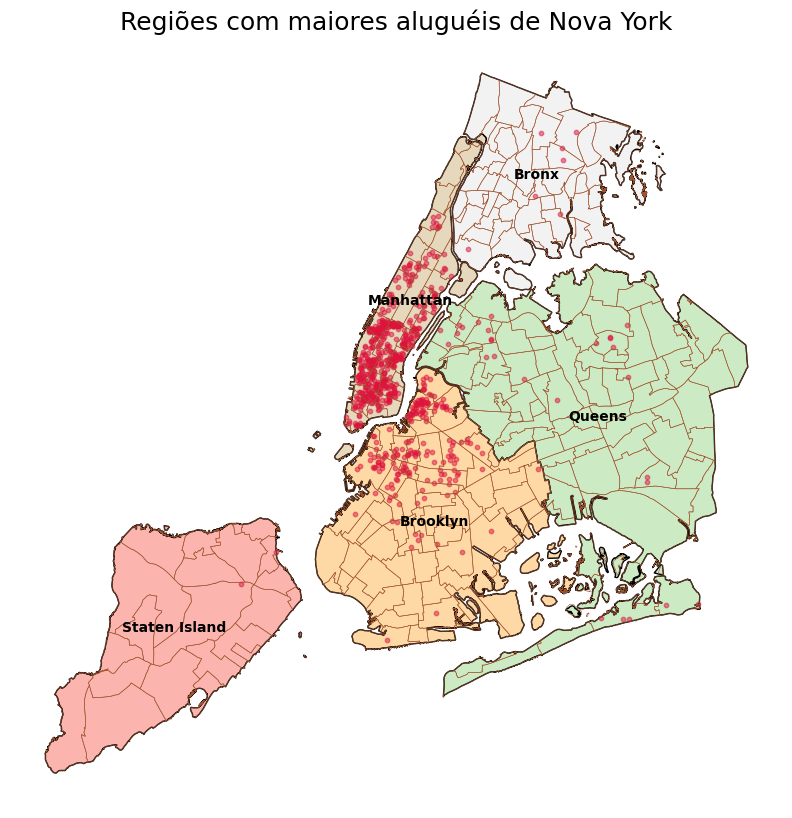

In [54]:
geometry = [Point(xy) for xy in zip(alugueis_mais_caros['longitude'], alugueis_mais_caros['latitude'])]
geo_df = gpd.GeoDataFrame(alugueis_mais_caros, geometry=geometry)

infos_ufs = gpd.read_file('nynta2020_23d/nynta2020.shp')

# Configurar o sistema de referência espacial para ambos os GeoDataFrames
geo_df = geo_df.set_crs(epsg=4326)
infos_ufs = infos_ufs.to_crs(epsg=4326)
gdf = gdf.to_crs(epsg=4326)


# Criar subplots
fig, ax = plt.subplots(figsize=(20, 10))

# Plotar mapa dos bairros
infos_ufs.boundary.plot(ax=ax, linewidth=0.4, edgecolor='sienna')

#Plotar mapa das regiões
gdf.plot(ax=ax, cmap = 'Pastel1', linewidth=1.0, edgecolor='black')

# Plotar os pontos do GeoDataFrame de aluguéis de propriedades
geo_df.plot(ax=ax, markersize=10, color='crimson', alpha=0.5)

plt.title("Regiões com aluguéis mais altos de Nova York", fontsize=18)
gdf.apply(lambda x: ax.annotate(text=x.BoroName, xy=x.geometry.centroid.coords[0], ha='center',
                                color = "black", weight='semibold'), axis=1)


ax.set_axis_off()


Selecionando os bairros com os maiores índices de aluguéis de alto valor, podemos observar que os pontos turísticos de Nova York têm influência tanto na quantidade de unidades disponíveis quanto no valor dos aluguéis.

# Hipotese 2

"Se estiver procurando alugar um apartamento ou casa inteira(Entire home/apt) em Manhattan, quais são os hosts que oferecem os melhores preços e em qual bairro estão localizados?"

In [55]:
hipotese_2 = df_aluguel_s_outliers.loc[(df_aluguel_s_outliers['bairro_group']== 'Manhattan') &
                              (df_aluguel_s_outliers['room_type']== 'Entire home/apt'),
                               ['host_name', 'bairro_group', 'bairro', 'room_type', 'price' ] ]
hipotese_2.sort_values(by='price')


,host_name,bairro_group,bairro,room_type,price
2859,Sally,Manhattan,East Village,Entire home/apt,10
23255,Amy,Manhattan,Upper East Side,Entire home/apt,10
46048,Rivka,Manhattan,Upper West Side,Entire home/apt,11
47978,Aude,Manhattan,Hell's Kitchen,Entire home/apt,15
8168,Silvia,Manhattan,SoHo,Entire home/apt,16
...,...,...,...,...,...
34389,Pranjal,Manhattan,Midtown,Entire home/apt,550
33032,Violetta,Manhattan,SoHo,Entire home/apt,550
3121,Kimberly,Manhattan,Upper East Side,Entire home/apt,550
34298,Pranjal,Manhattan,Hell's Kitchen,Entire home/apt,550


Também é possível encontrar aluguéis mais acessíveis nas proximidades da região central. Alguns hosts, como Sally e Rivka, oferecem aluguéis com valores próximos a 10 dólares.

# Hipotese 3

"Será que a média do aluguel do host aumenta conforme o número de quartos que ele possui na plataforma?"

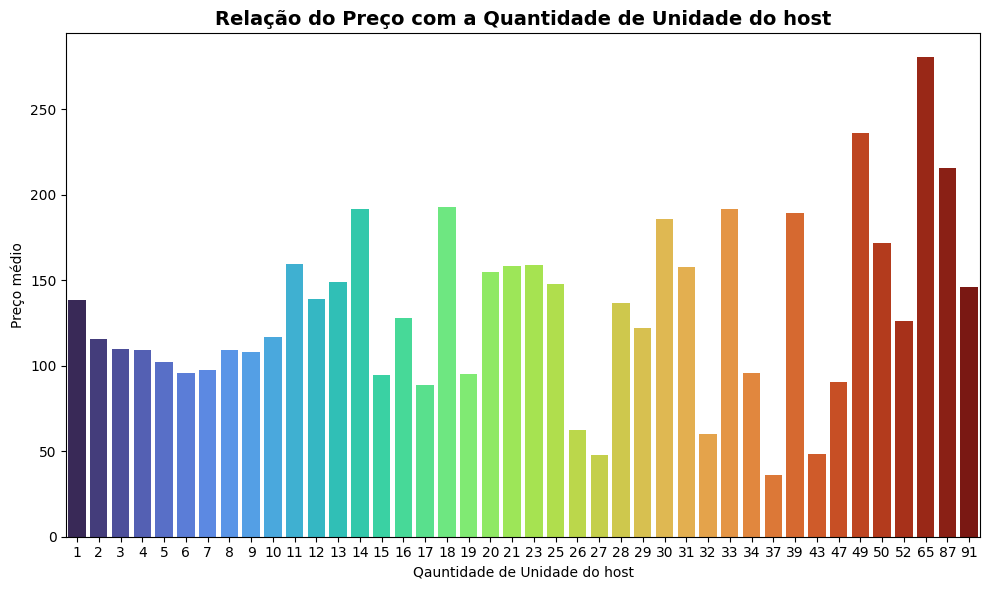

In [99]:

plt.figure(figsize=(10, 6))
sns.barplot(x='calculado_host_listings_count', y='price',
             data=df_aluguel_s_outliers, palette='turbo', ci = None)
plt.xlabel('Qauntidade de Unidade do host')
plt.ylabel('Preço médio')
plt.title('Relação do Preço com a Quantidade de Unidade do host',  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Observa-se que não há um padrão claro entre a quantidade de unidades que um host possui na plataforma e a média do aluguel cobrado por ele. Um destaque é para os hosts que possuem 65 unidades e apresentam uma média de aluguel maior.